In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import KeyedVectors,Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
df_true.shape, df_fake.shape

((21417, 4), (23481, 4))

In [4]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [8]:
df_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

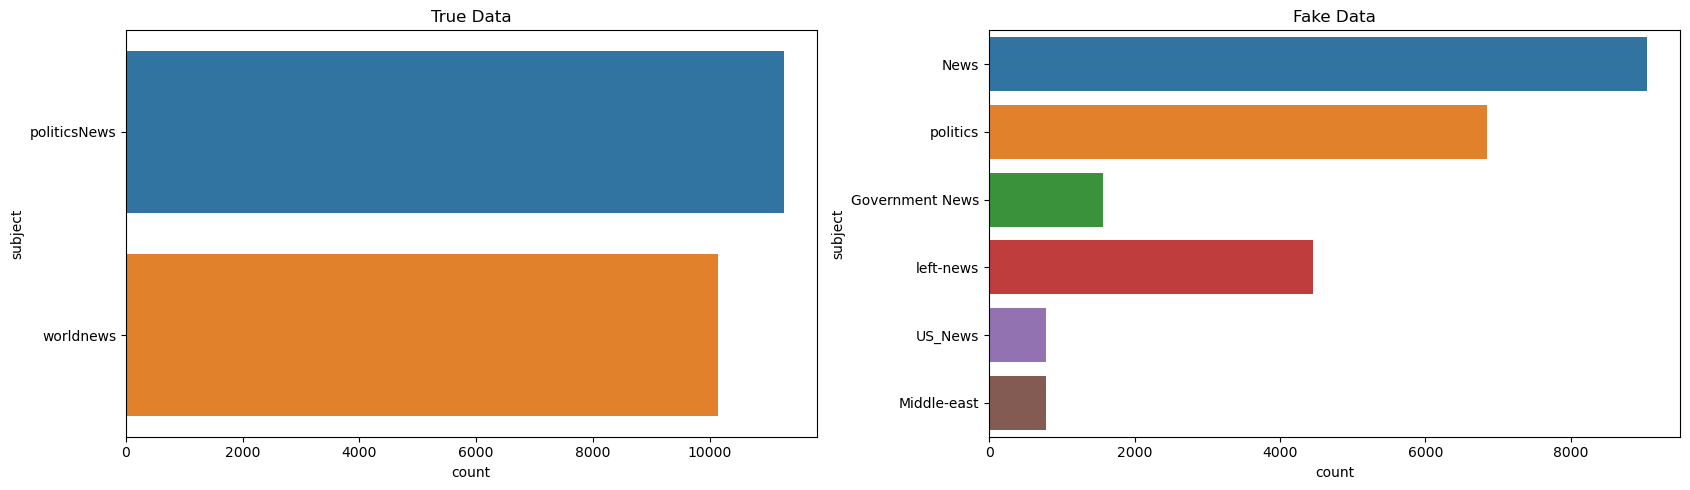

In [9]:
fig , axes = plt.subplots(1,2, figsize = (17,5))
sns.countplot(data=df_true, y='subject',ax = axes[0])
sns.countplot(data = df_fake,y = 'subject')
axes[0].set_title("True Data")
axes[1].set_title("Fake Data")
plt.tight_layout()
plt.show();

In [10]:
df_true["label"] = 0
df_fake["label"] = 1


df = pd.concat([df_true,df_fake], ignore_index = True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [11]:
df.label.value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [12]:
df['content'] = df['subject']+' '+df['title']+' '+df['text']
df.head()

,title,text,subject,date,label,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"politicsNews As U.S. budget fight looms, Repub..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,politicsNews U.S. military to accept transgend...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,politicsNews Senior U.S. Republican senator: '...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,politicsNews FBI Russia probe helped by Austra...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,politicsNews Trump wants Postal Service to cha...


In [14]:
df['content'][5]

'FBI Russia probe helped by Australian diplomat tip-off: NYT'

In [96]:
df.drop(['title', 'text', 'subject', 'date'], axis = 1, inplace = True)

In [97]:
df.head()

,label,content
0,0,"politicsNews As U.S. budget fight looms, Repub..."
1,0,politicsNews U.S. military to accept transgend...
2,0,politicsNews Senior U.S. Republican senator: '...
3,0,politicsNews FBI Russia probe helped by Austra...
4,0,politicsNews Trump wants Postal Service to cha...


In [98]:
import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [99]:
import spacy 
nlp = spacy.load("en_core_web_lg")

In [110]:
def preprocess_vectorize(text):
    doc = nlp(text)
    
    filtered_token = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_token.append(token.lemma_)
            
    return filtered_token        

In [111]:
df['vector'] = df['content'].apply(lambda text: preprocess_vectorize(text))

AttributeError: 'KeyedVectors' object has no attribute 'get_mean_vector'

In [109]:
wv.get_mean_vector()

AttributeError: 'KeyedVectors' object has no attribute 'get_mean_vector'

In [121]:
wv.get_vecattr(['good','great'])[:3]

TypeError: get_vecattr() missing 1 required positional argument: 'attr'

In [118]:
v1 = wv['good']
v2 = wv['great']

np.mean([v1,v2], axis=0)[:3]

array([ 0.05615234,  0.1352539 , -0.02294922], dtype=float32)